In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **Problem 1** 

part a and c on image

In [20]:
def f(x):
    return 9 * np.exp(-2 * x**2)

def calc_f_prime(x):
    return -36 * x * np.exp(-2 * x**2)

def forward_difference(x, h):
    return (f(x + h) - f(x)) / h

def central_difference(x, h):
    return (f(x + h) - f(x - h)) / (2*h)

x_values = np.linspace(-1, 1, 100)
delta_x_values = [0.1, 0.5, 1]

real_values = calc_f_prime(x_values)
forward_results = {}
central_results = {}

for h in delta_x_values:
    forward_diff = forward_difference(x_values, h)
    central_diff = central_difference(x_values, h)

    forward_results[h] = forward_diff
    central_results[h] = central_diff

plt.figure(figsize=(10, 6))
plt.plot(x_values, real_values, label="Exact Derivative", color='black', linestyle='--')
for h in delta_x_values:
    plt.plot(x_values, forward_results[h], label=f"Forward Difference, delta_x={h}")
    plt.plot(x_values, central_results[h], label=f"Central Difference, delta_x={h}")
plt.title("Forward and Central Differences for f'(x) vs Exact Derivative")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend()
plt.grid(True)
plt.show()

SyntaxError: keyword argument repeated: figsize (43881922.py, line 27)

a smaller delta x is better and is closer to the true derivative compared to larger values which deviate more. Also, central difference seems to be a more accurate method

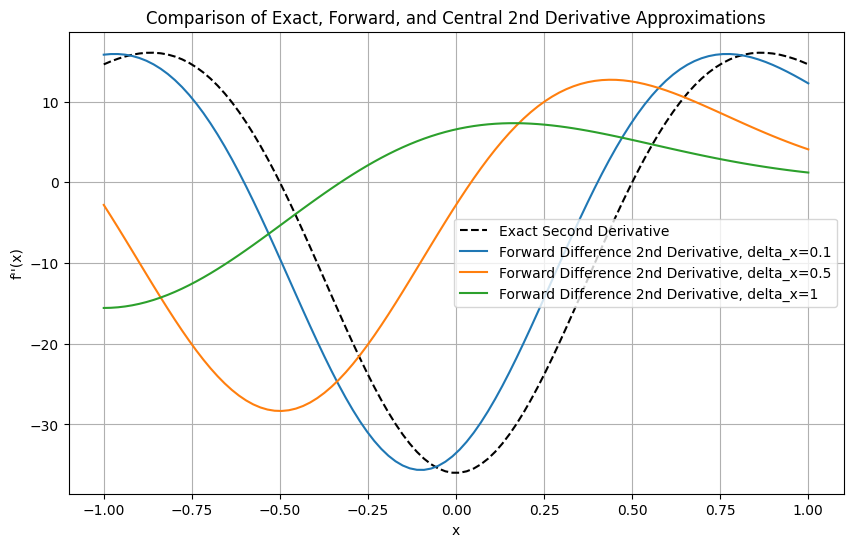

In [8]:
def calc_f_prime_second(x):
    return np.exp(-2 * x**2) * (144 * x**2 - 36)

def forward_difference_second_derivative(f, x, h):
    return (f(x + 2*h) - 2 * f(x + h) + f(x)) / h**2

f_second_exact = calc_f_prime_second(x_values)
forward_second_diff_results = {}
central_second_diff_results = {}

for h in delta_x_values:
    forward_diff = forward_difference_second_derivative(f, x_values, h)
    #central_diff = central_difference_second_derivative(f, x_values, h)
    forward_second_diff_results[h] = forward_diff
    central_second_diff_results[h] = central_diff

plt.figure(figsize=(10, 6))
plt.plot(x_values, f_second_exact, label="Exact Second Derivative", color='black', linestyle='--')
for h in delta_x_values:
    plt.plot(x_values, forward_second_diff_results[h], label=f"Forward Difference 2nd Derivative, delta_x={h}")
    #plt.plot(x_values, central_second_diff_results[h], label=f"Central Difference 2nd Derivative, detla_x={h}")
plt.title("Comparison of Exact, Forward, and Central 2nd Derivative Approximations")
plt.xlabel("x")
plt.ylabel("f''(x)")
plt.legend()
plt.grid(True)
plt.show()

Smaller delta x matches the exact derivative better than larger delta x's, also central difference does a better job getting closer to the real value then forward difference

# **Problem 2**

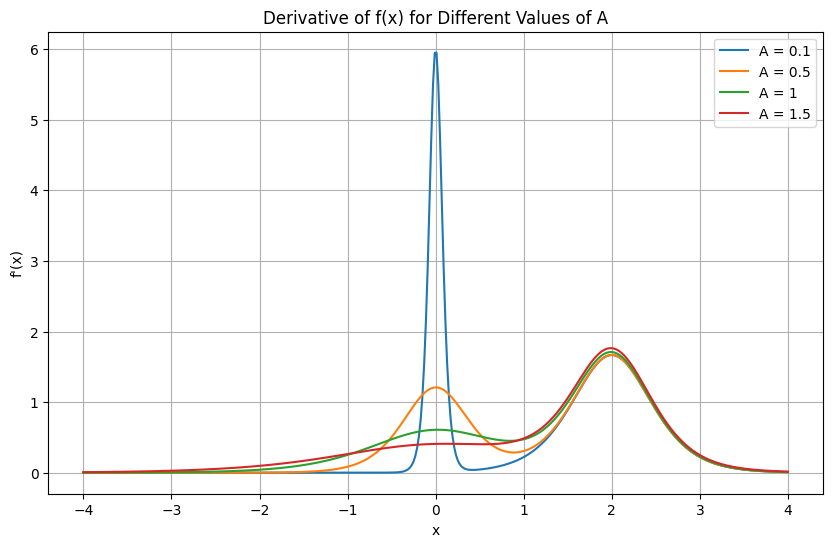

In [9]:
def sech2(x):
    return 1 / np.cosh(x)**2

def f_prime(x, A):
    return ((0.6 * sech2(x / A)) / A) + (sech2((x - 2) / 0.6) / 0.6)

x_values = np.linspace(-4, 4, 400)
A_values = [0.1, 0.5, 1, 1.5]

plt.figure(figsize=(10, 6))
for A in A_values:
    plt.plot(x_values, f_prime(x_values, A), label=f"A = {A}")
plt.title("Derivative of f(x) for Different Values of A")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend()
plt.grid(True)
plt.show()

Smaller values of A make the derivative a lot sharper at x = 0 meaning a quick change in the function compared to higher values of A which make smooth the derivative out at x = 0

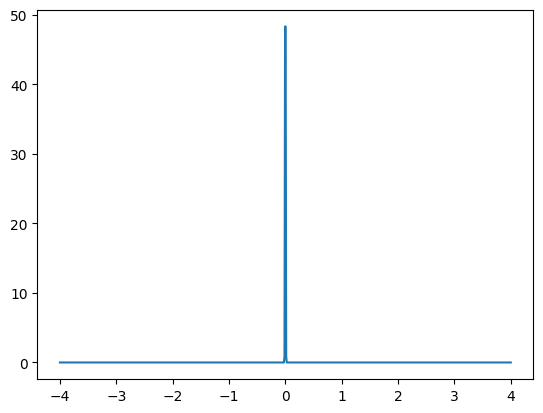

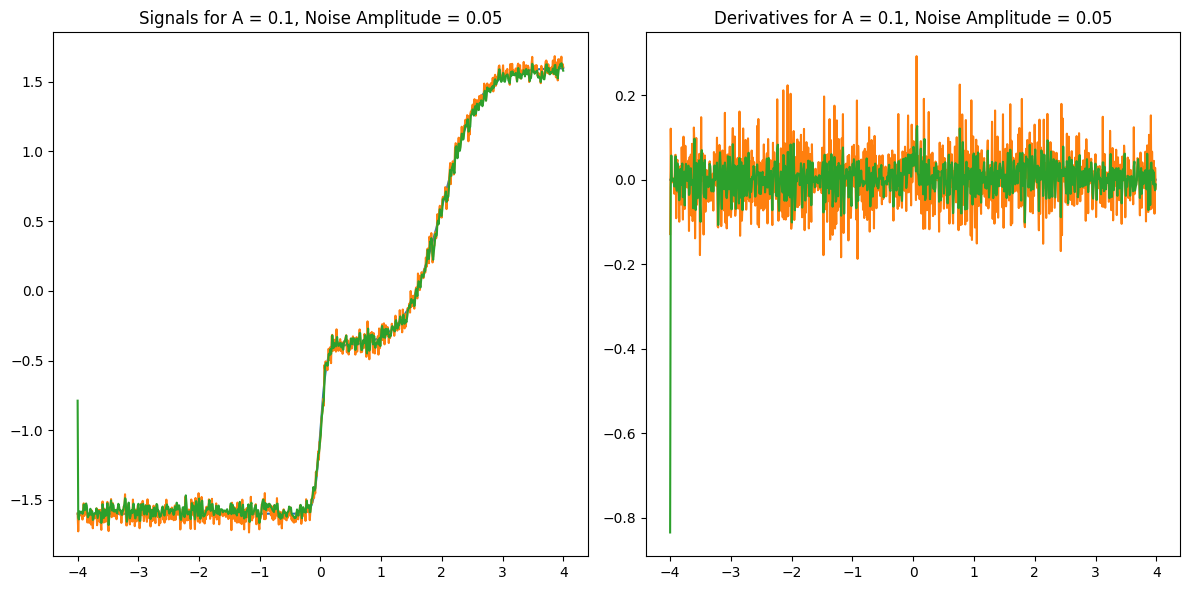

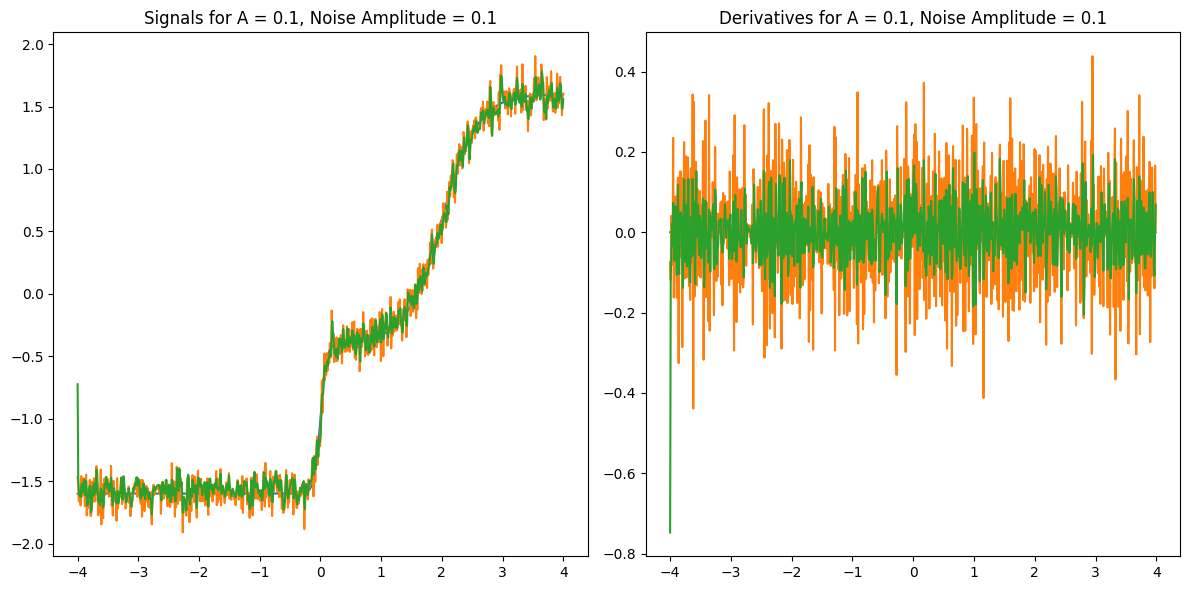

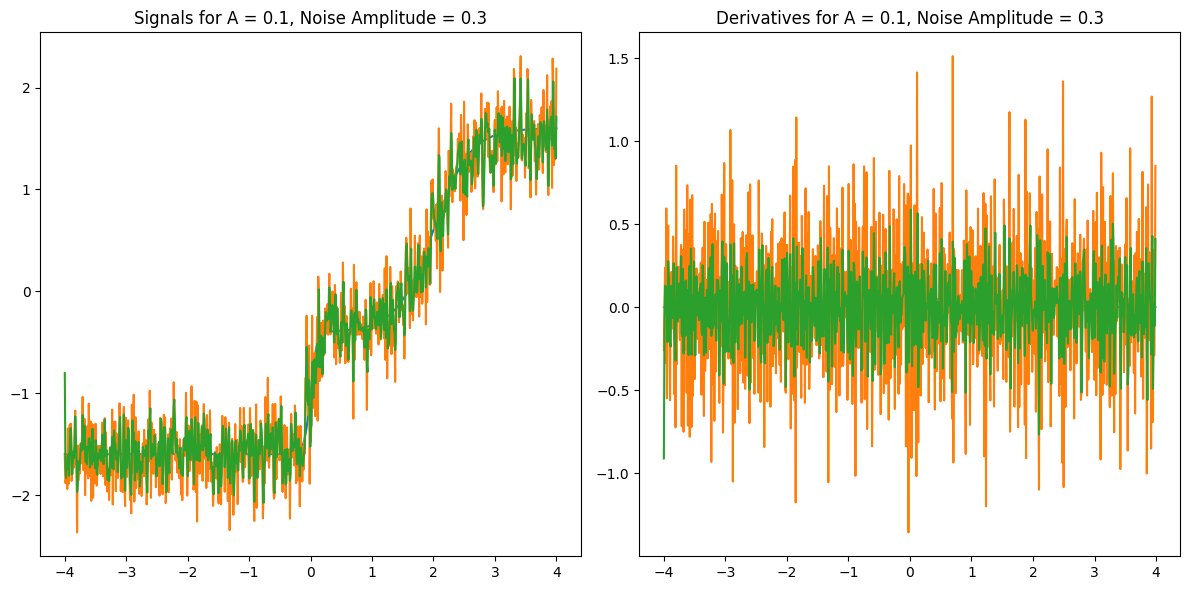

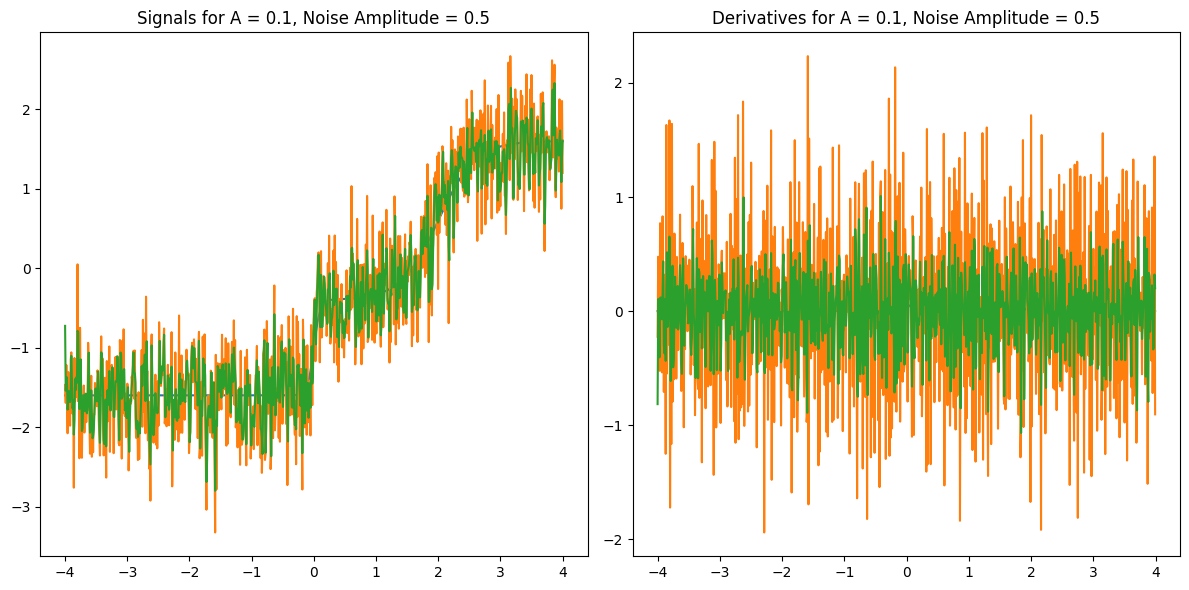

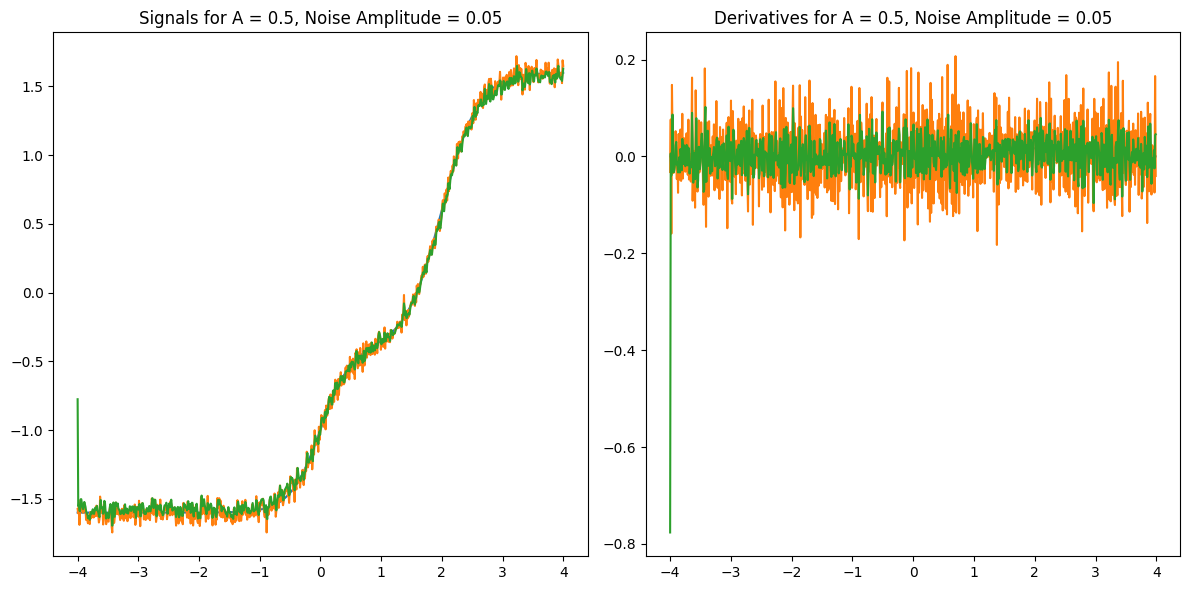

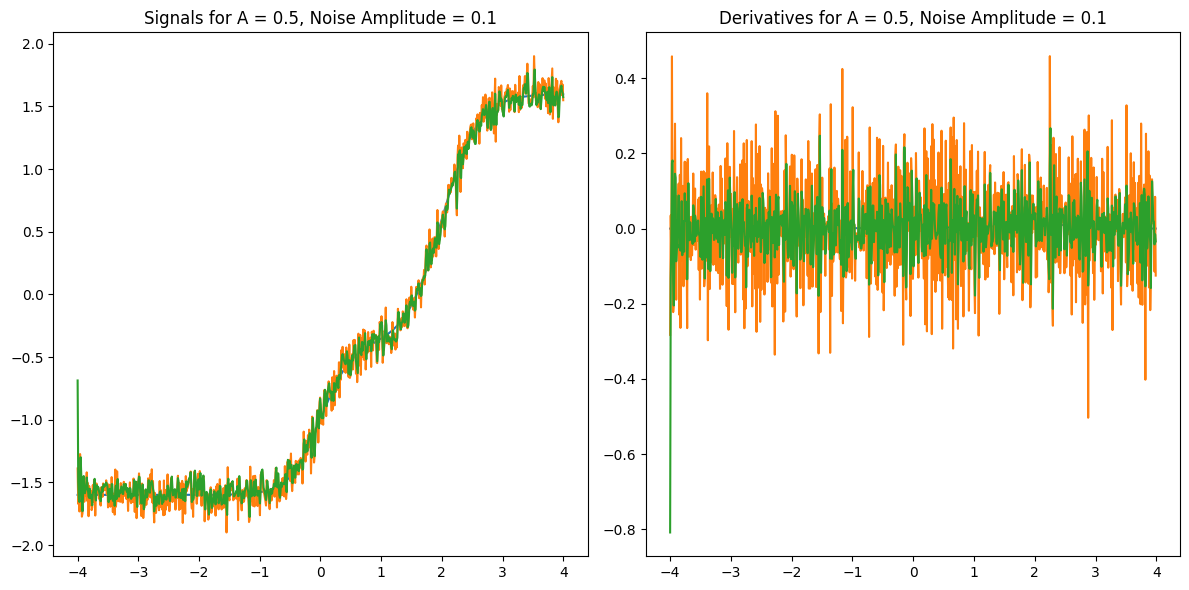

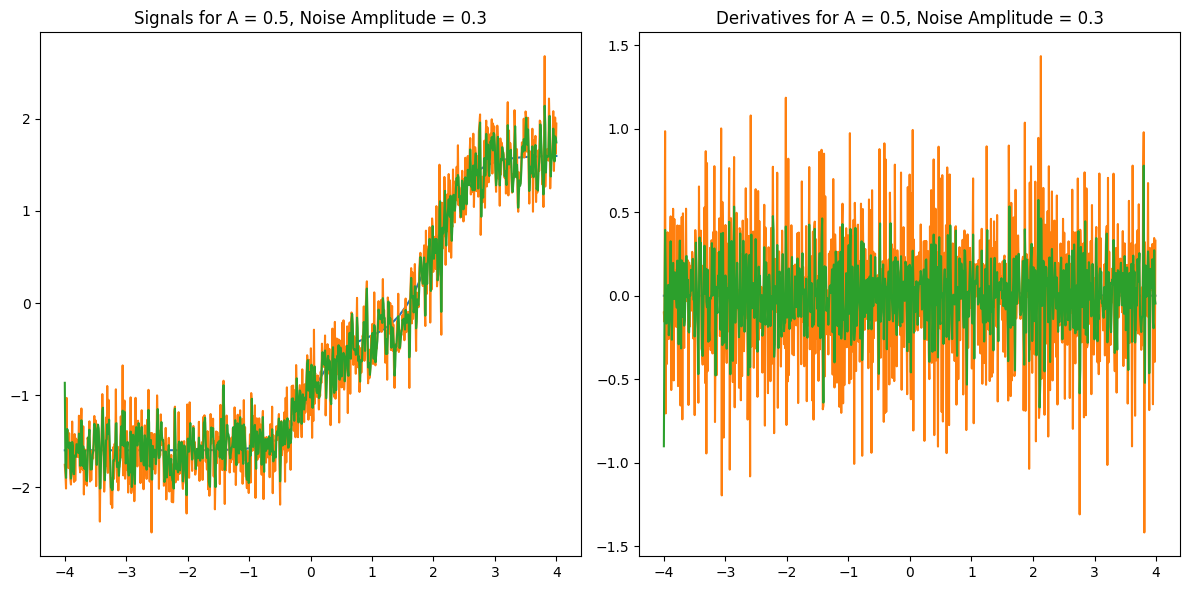

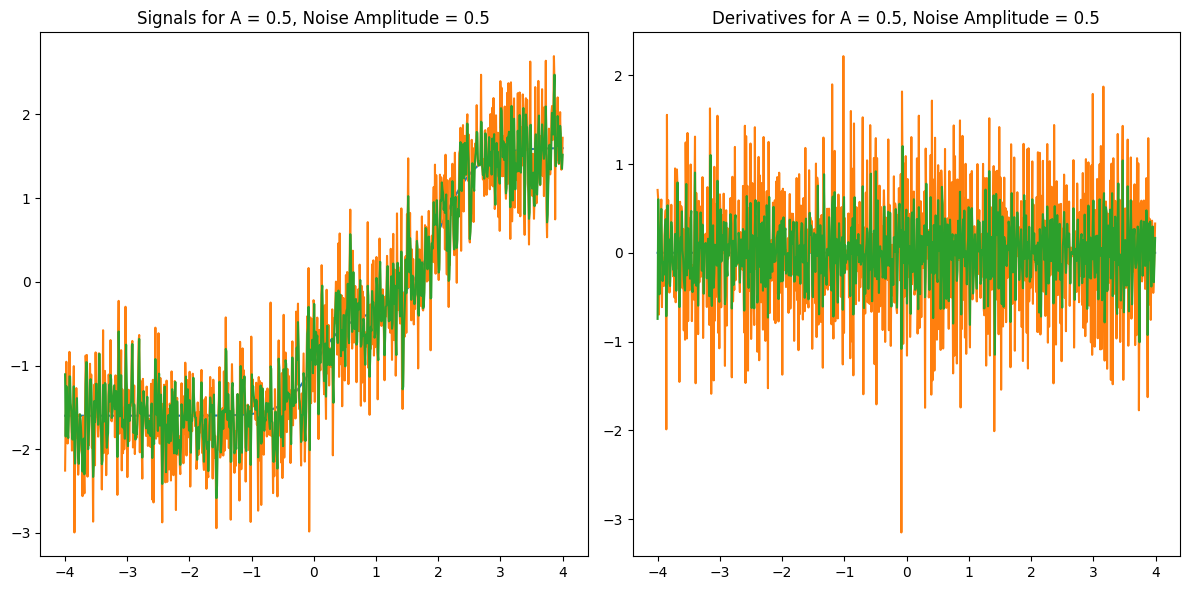

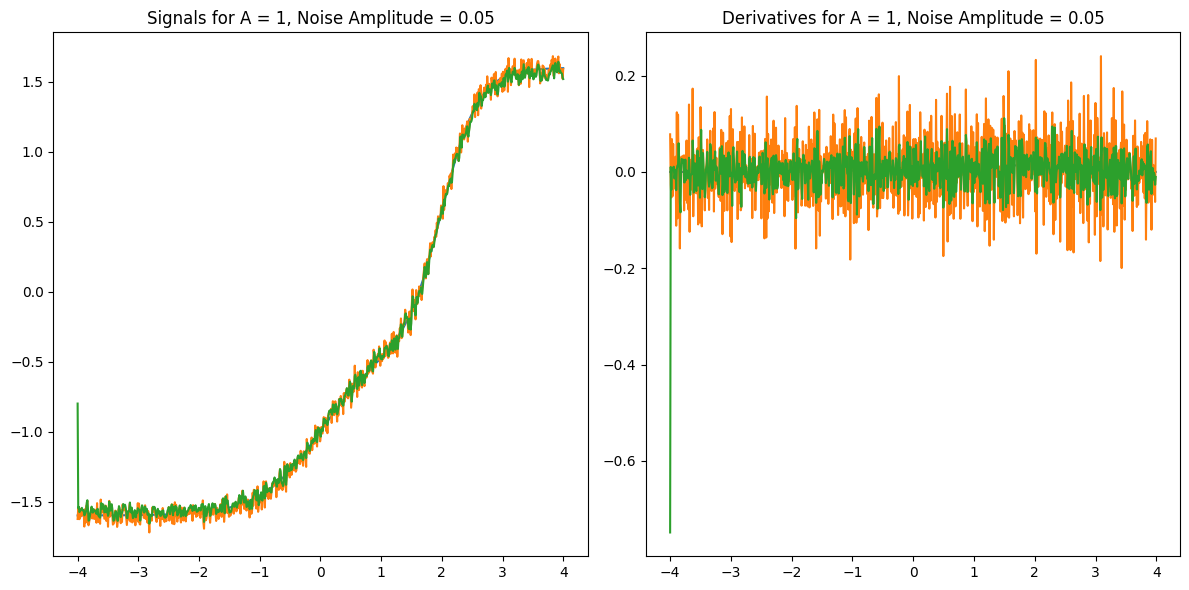

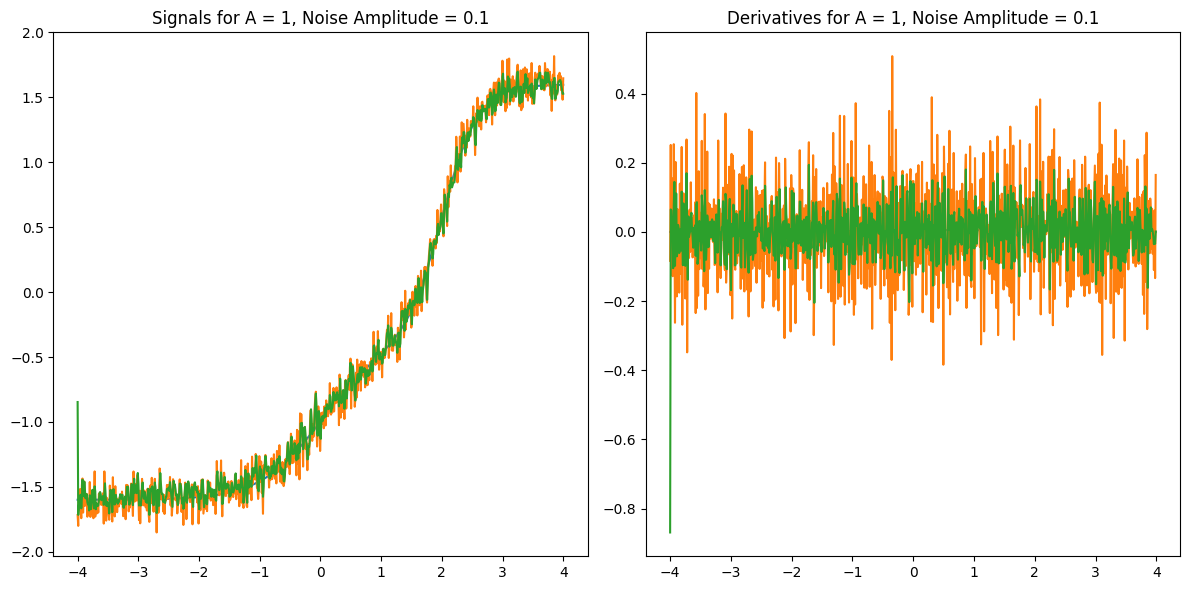

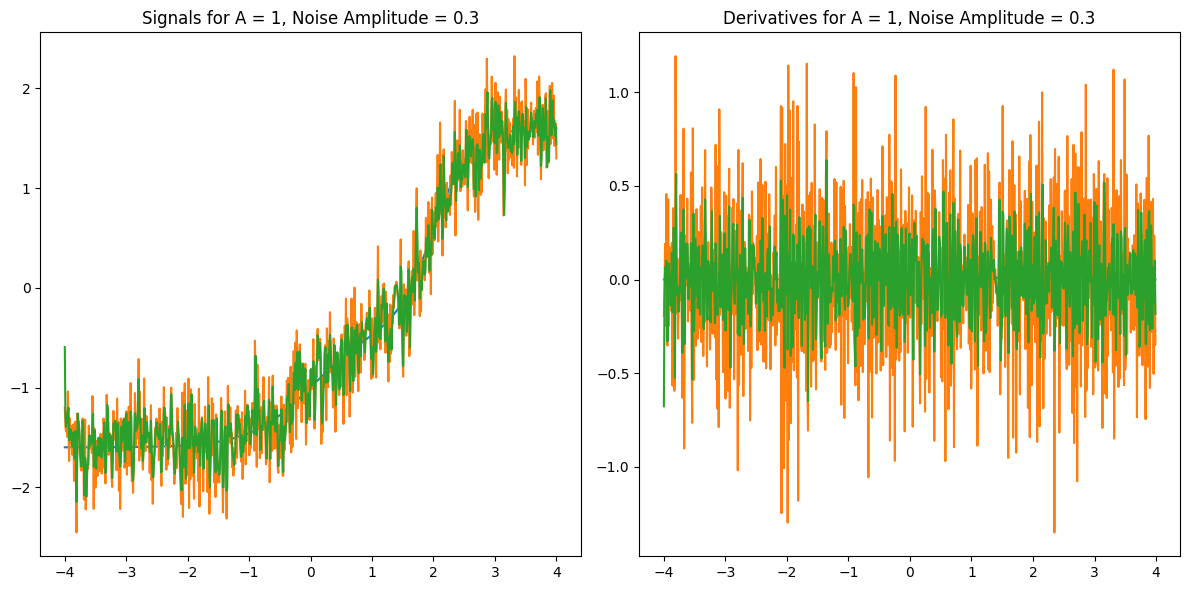

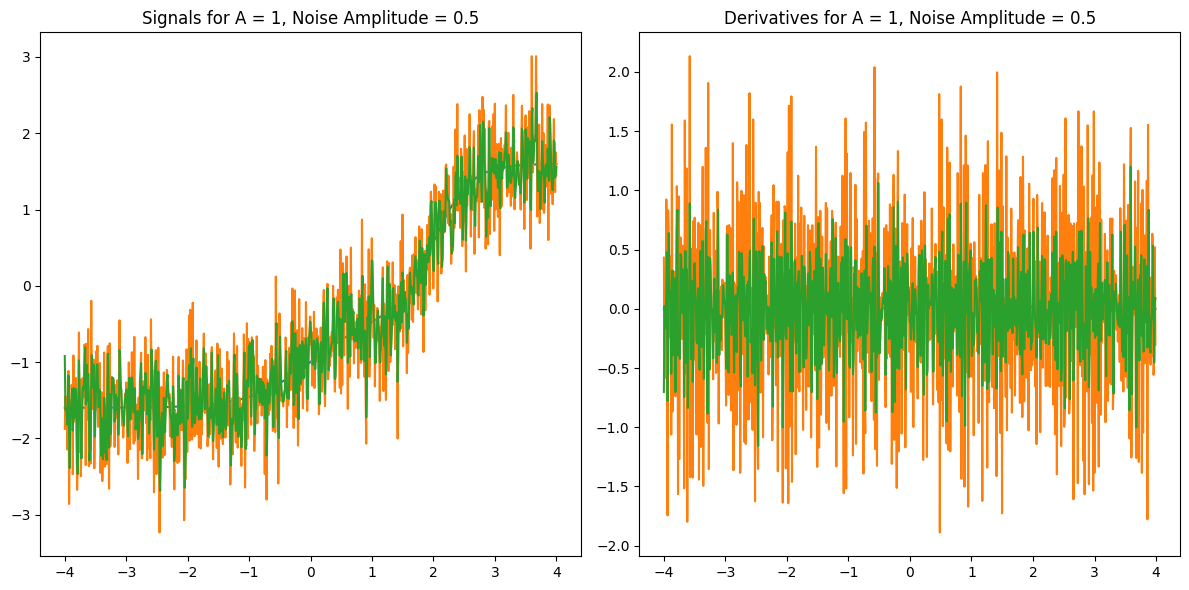

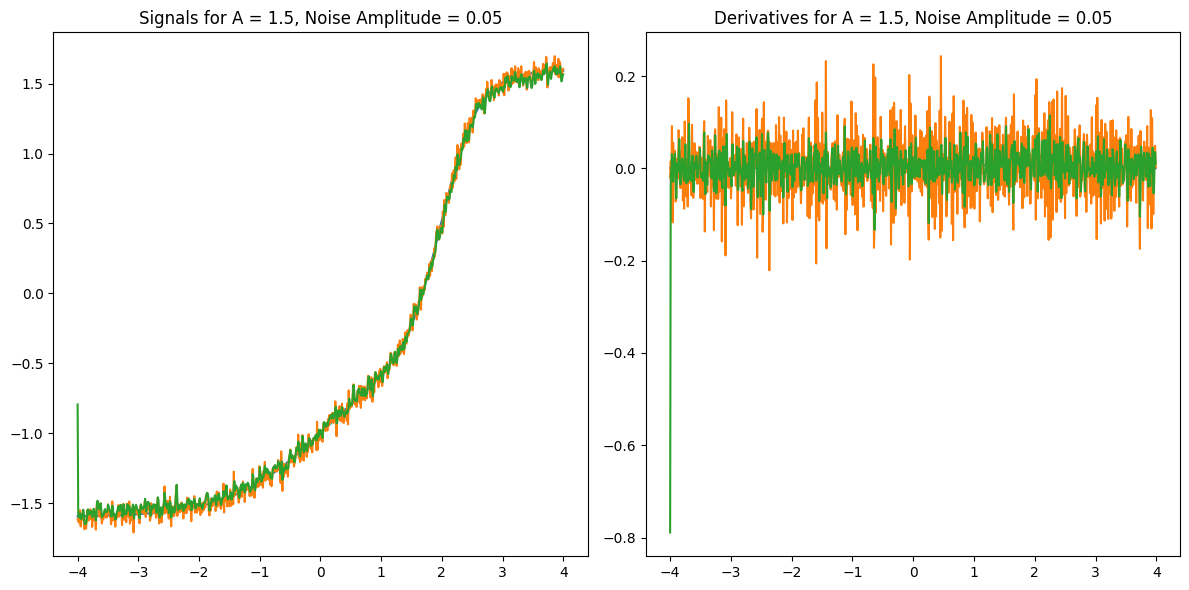

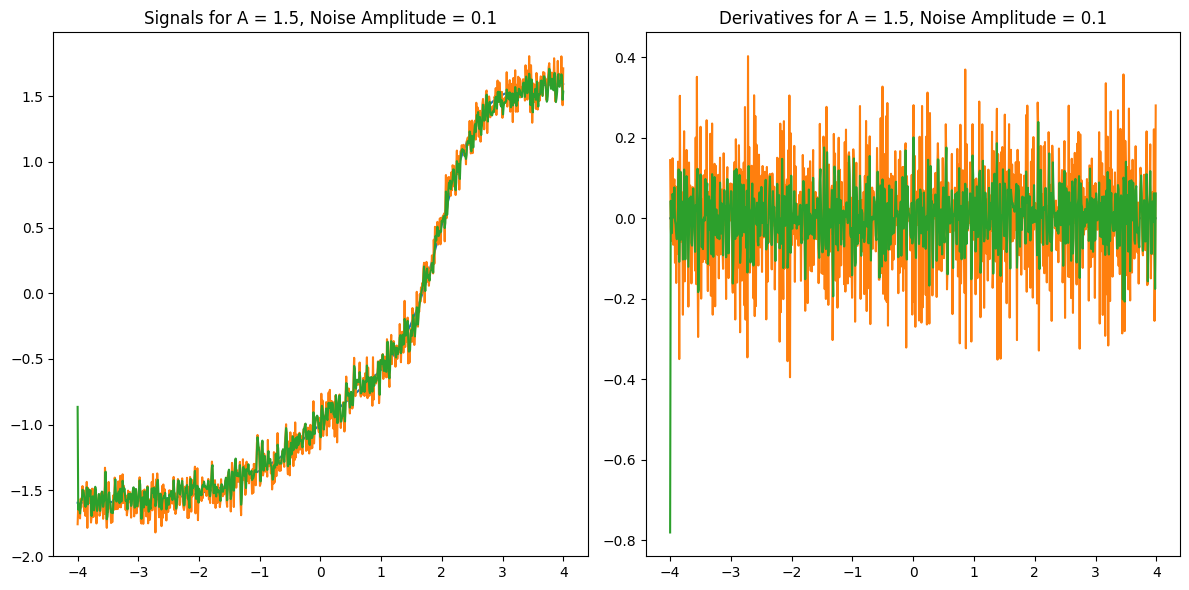

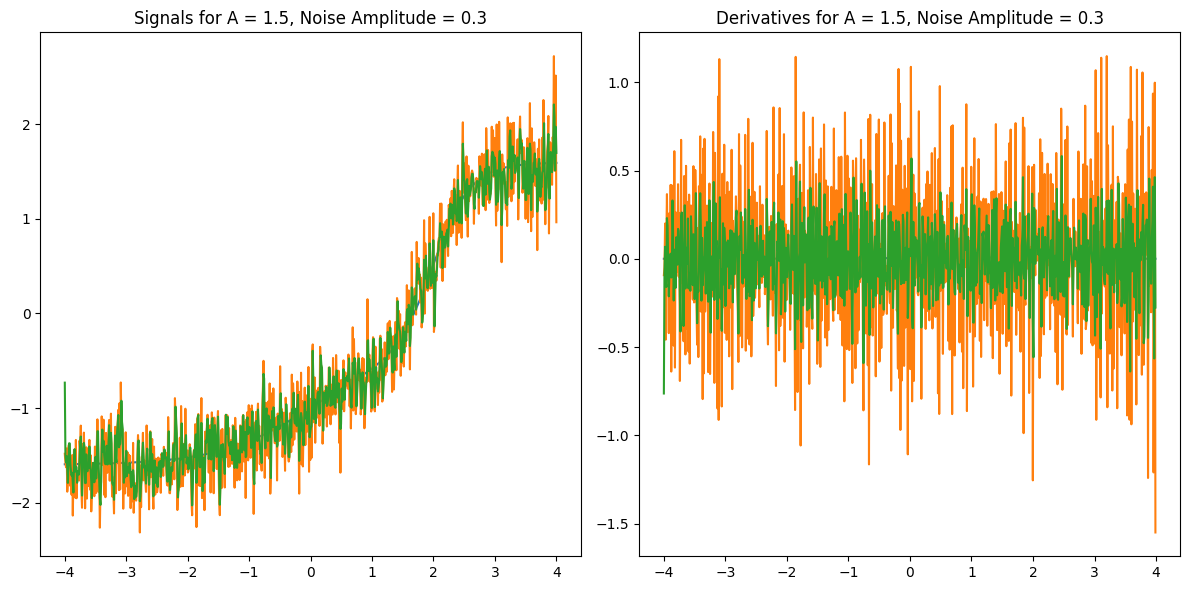

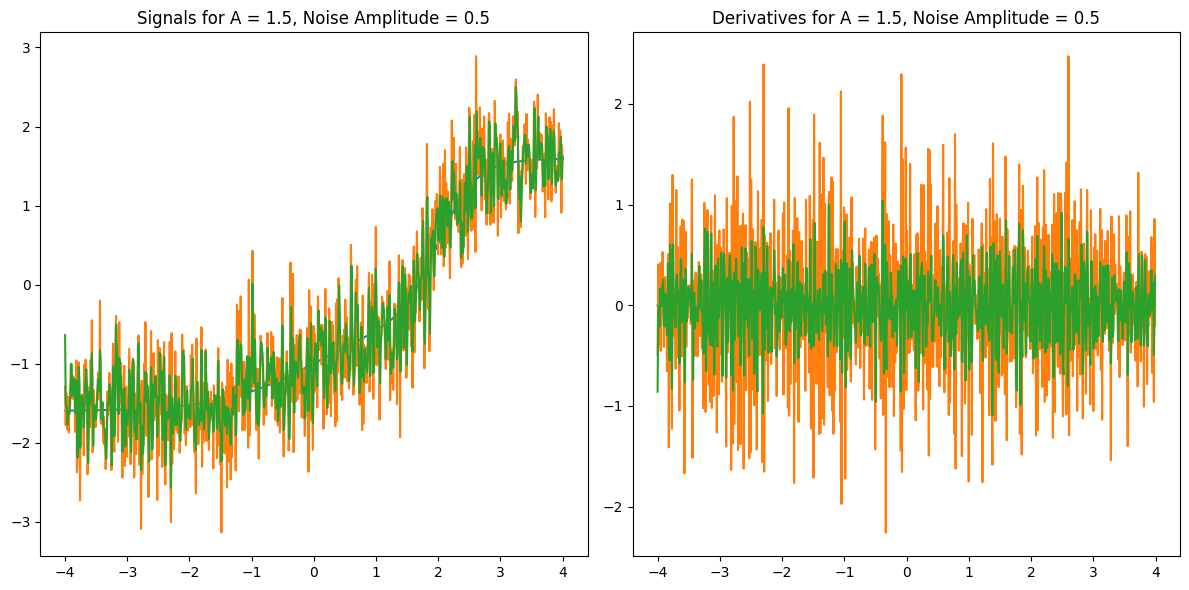

In [21]:
N = 800
sig = 0.005

def gaussian(x):
    return np.exp(-(x/sig)**2/2) / (sig*(2*np.pi)**0.5)

x = np.linspace(-4,4,N)
g = gaussian(x)

plt.figure(1)
plt.plot(x,g)

noise_amplitudes = [0.05, 0.1, 0.3, 0.5]

for A in A_values:
    for amp in noise_amplitudes:
        noise = np.random.normal(0,amp,N)
        clean_signal = 0.6 * np.tanh(x/A) + np.tanh((x-2)/0.6)
        noisy_signal = clean_signal + noise

        smooth_signal = np.convolve(g,noisy_signal,mode="same")*(x[1]-x[0])

        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
        ax[0].plot(x,clean_signal,x,noisy_signal,x,smooth_signal)
        ax[0].set_title(f"Signals for A = {A}, Noise Amplitude = {amp}")


        x_diff = x[:-1]
        #plt.figure()
        ax[1].plot (x_diff,np.diff(clean_signal),x_diff,np.diff(noisy_signal),x_diff,np.diff(smooth_signal))
        ax[1].set_title(f"Derivatives for A = {A}, Noise Amplitude = {amp}")
        
        plt.tight_layout()

Smaller values of A show more noticible effects from noise becuase of sharp transitions in the signal. Larger values seem to be more resistant. And as noise increases amplitude smoothing becomes more difficult.

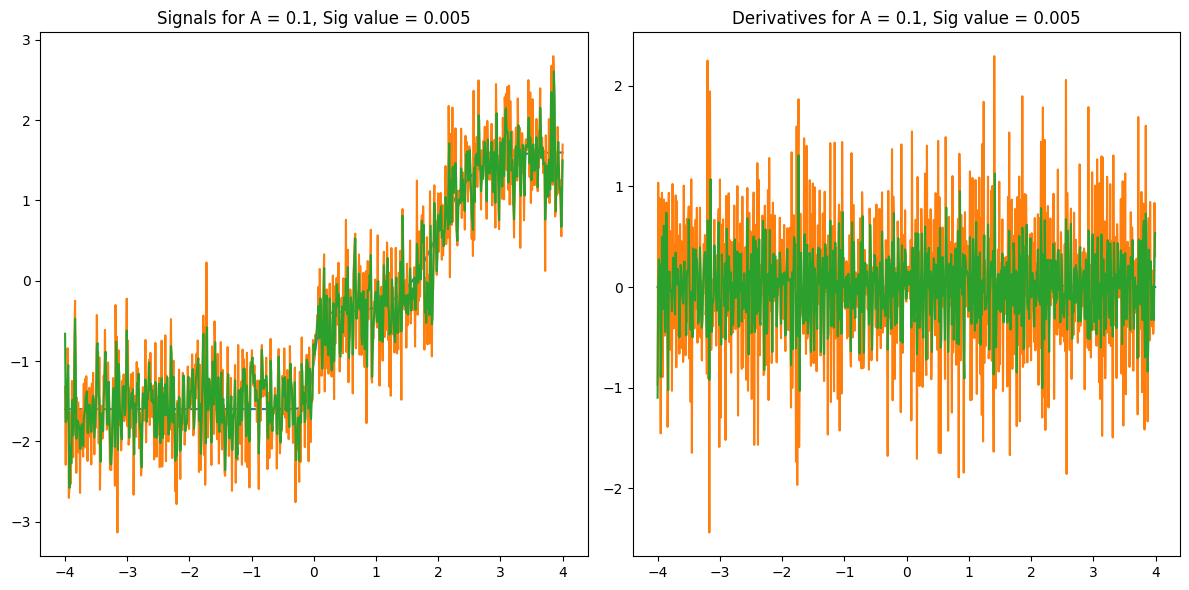

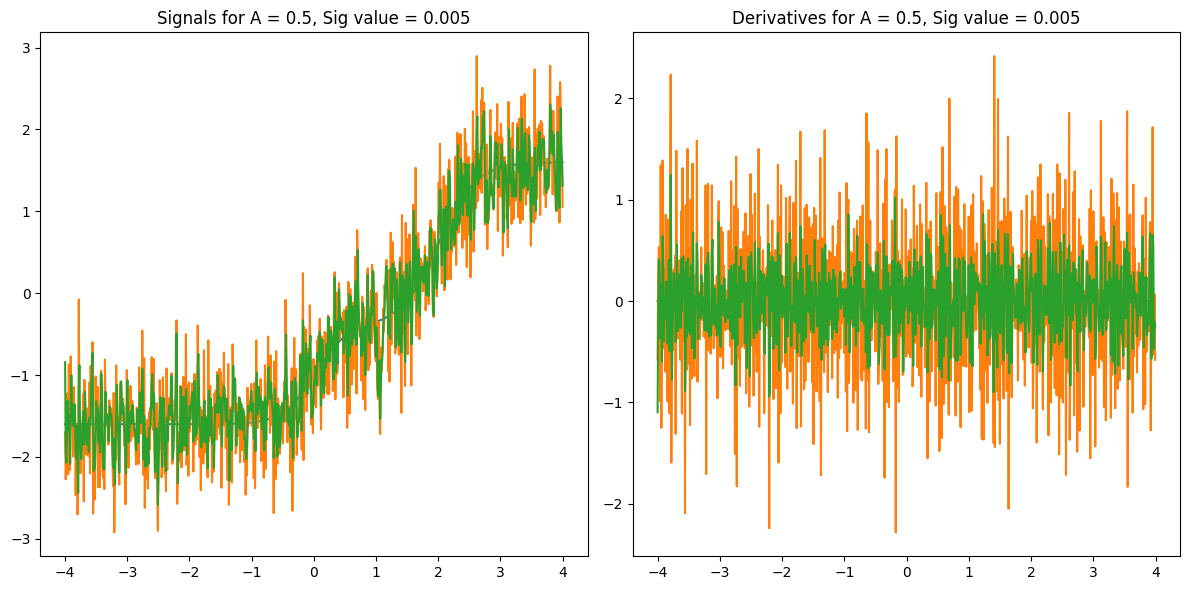

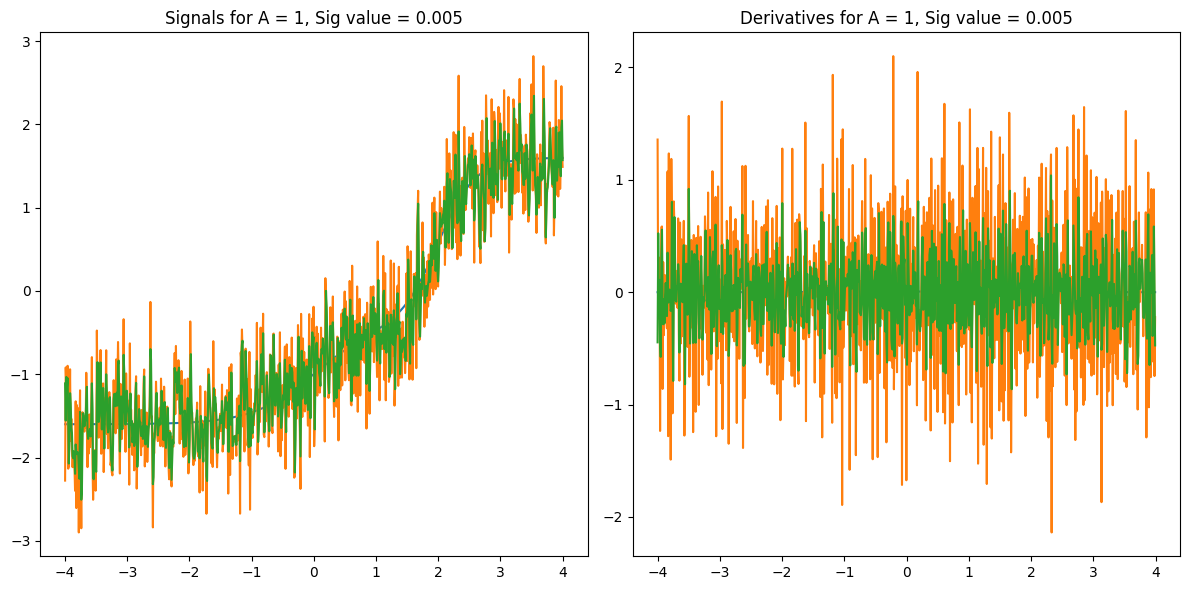

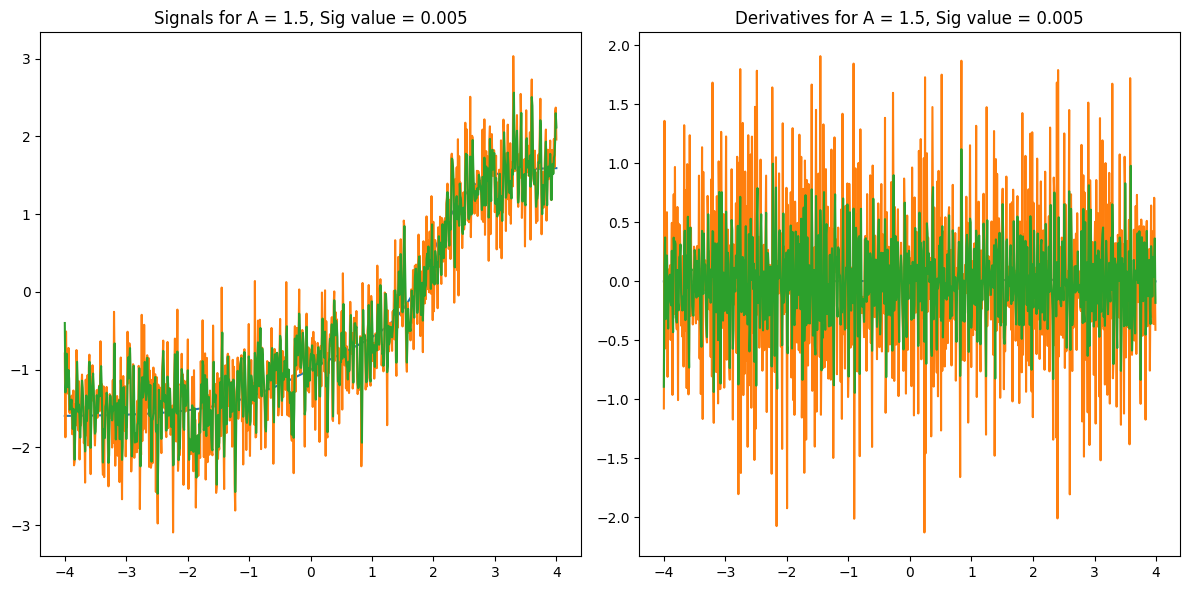

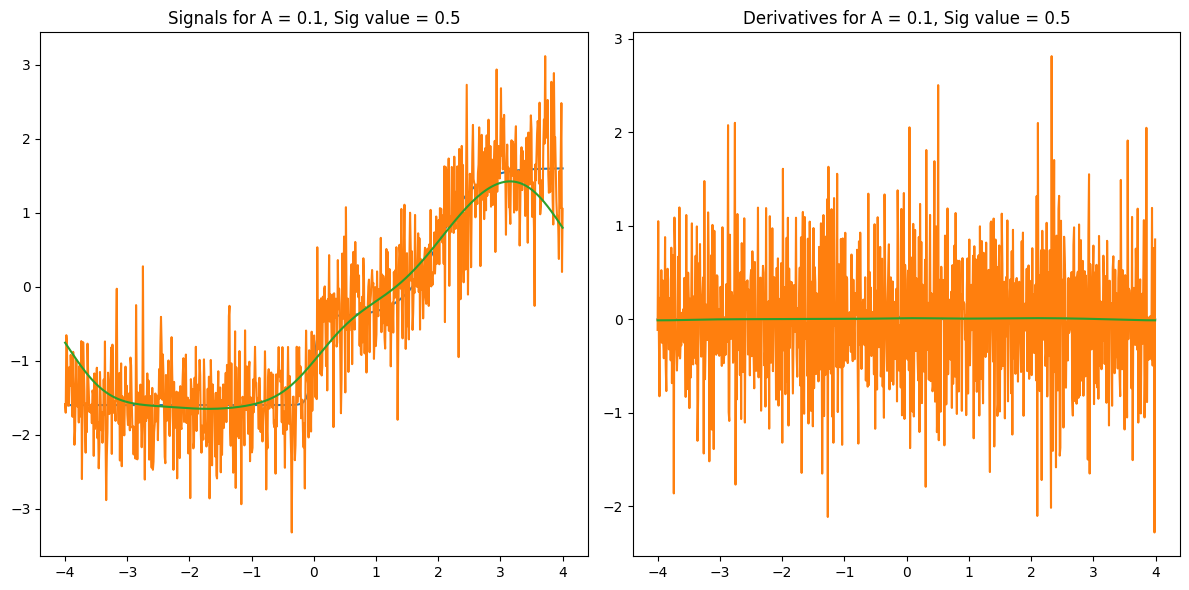

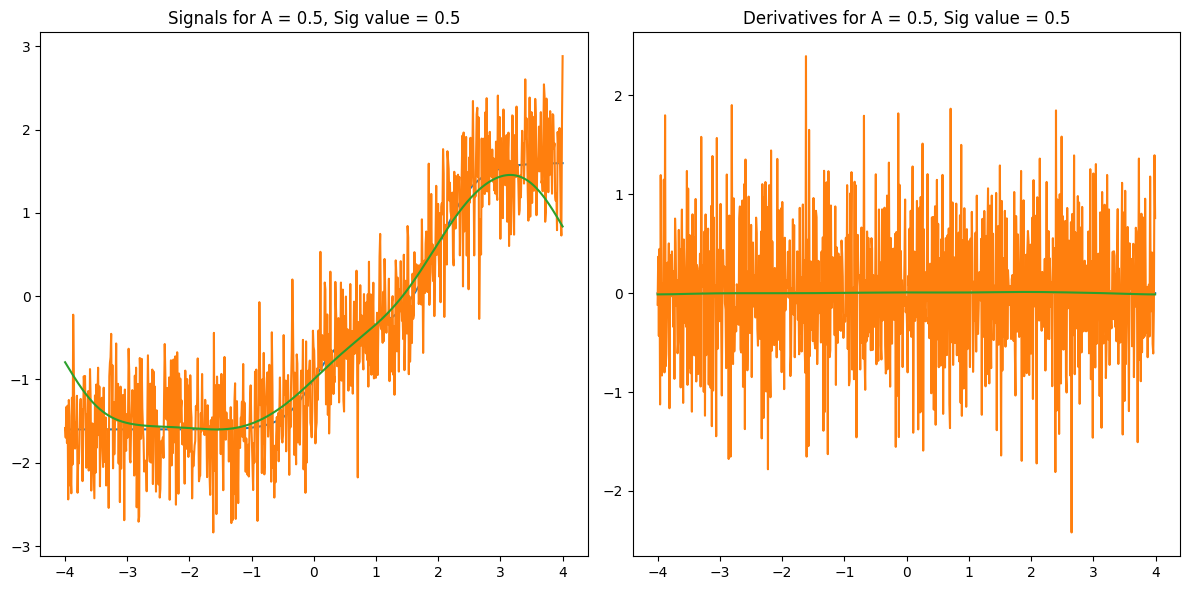

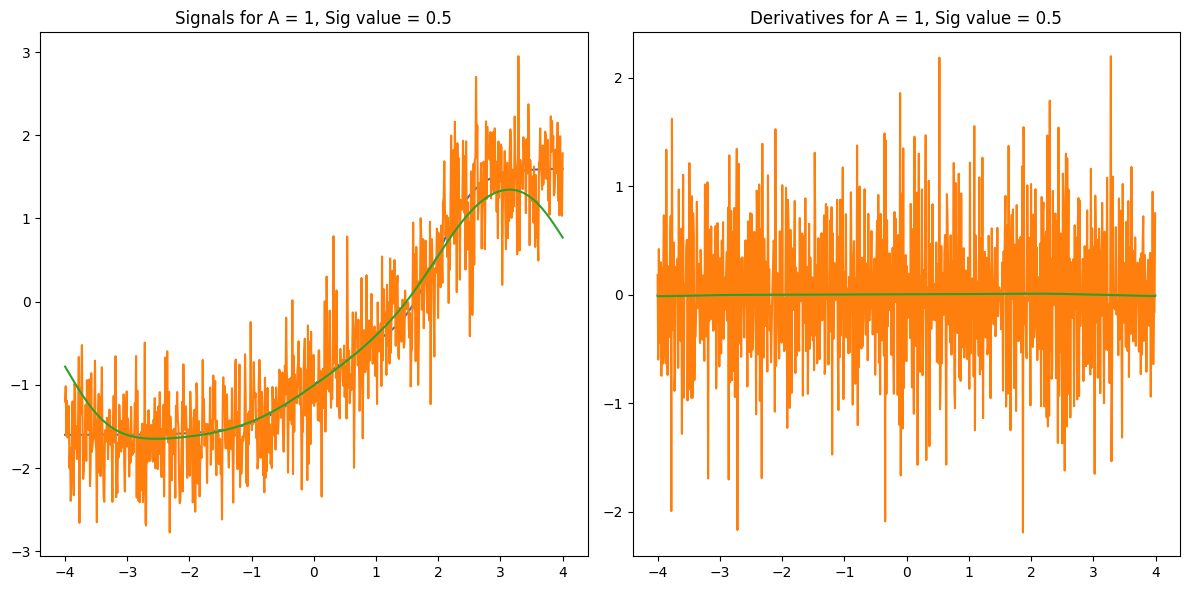

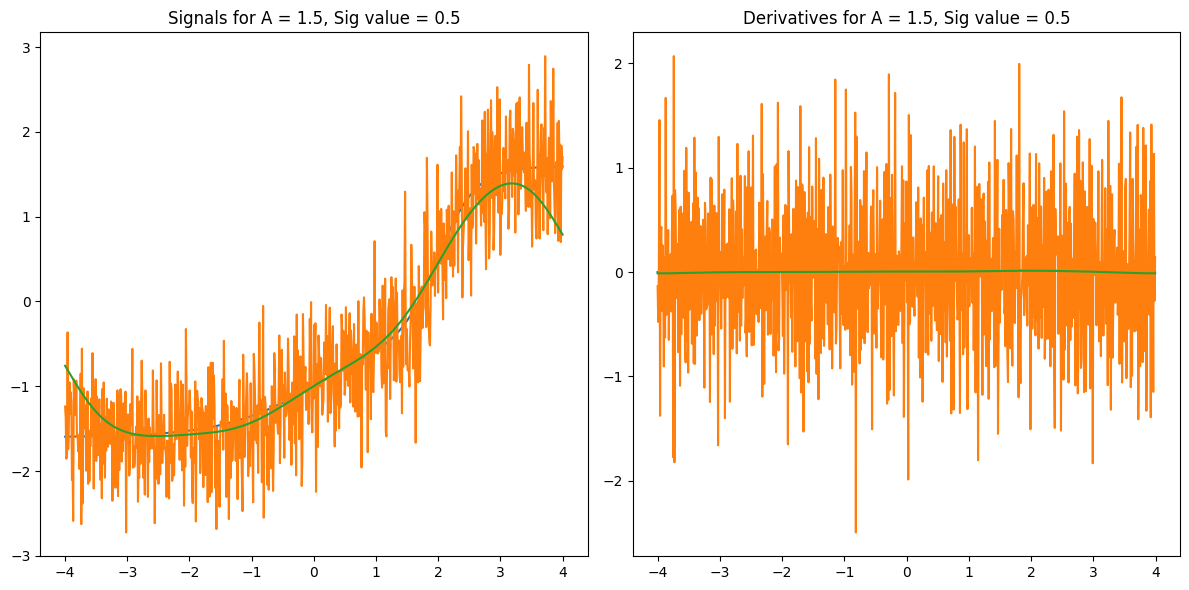

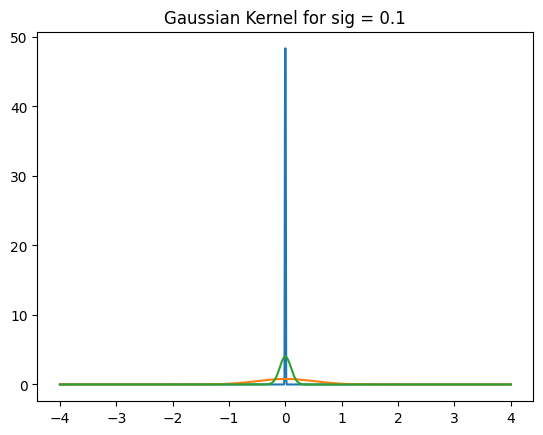

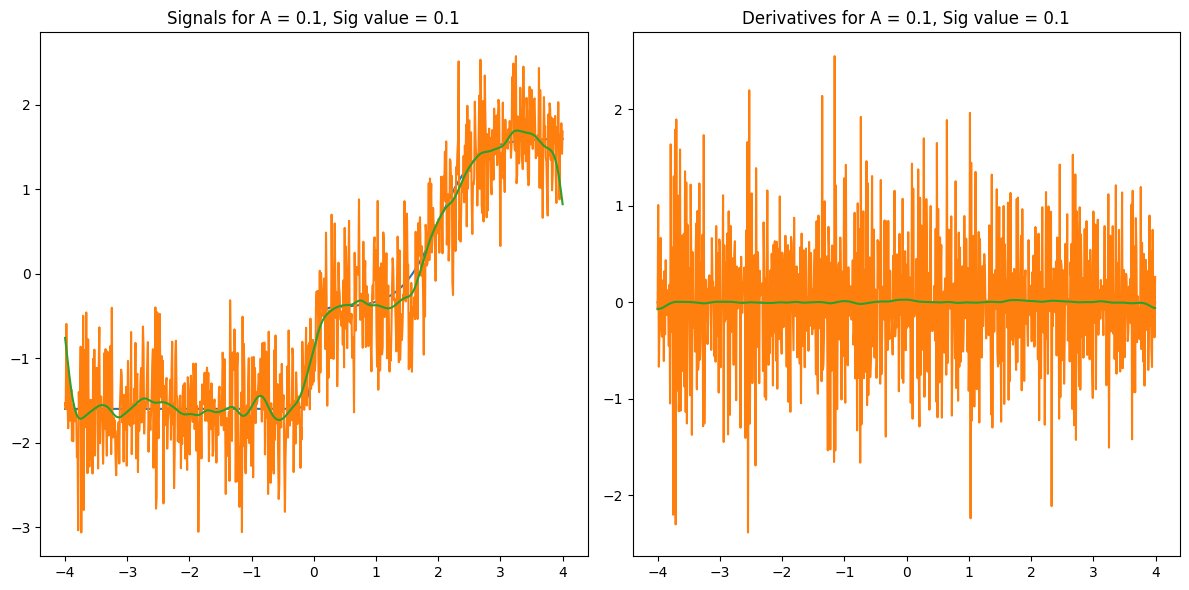

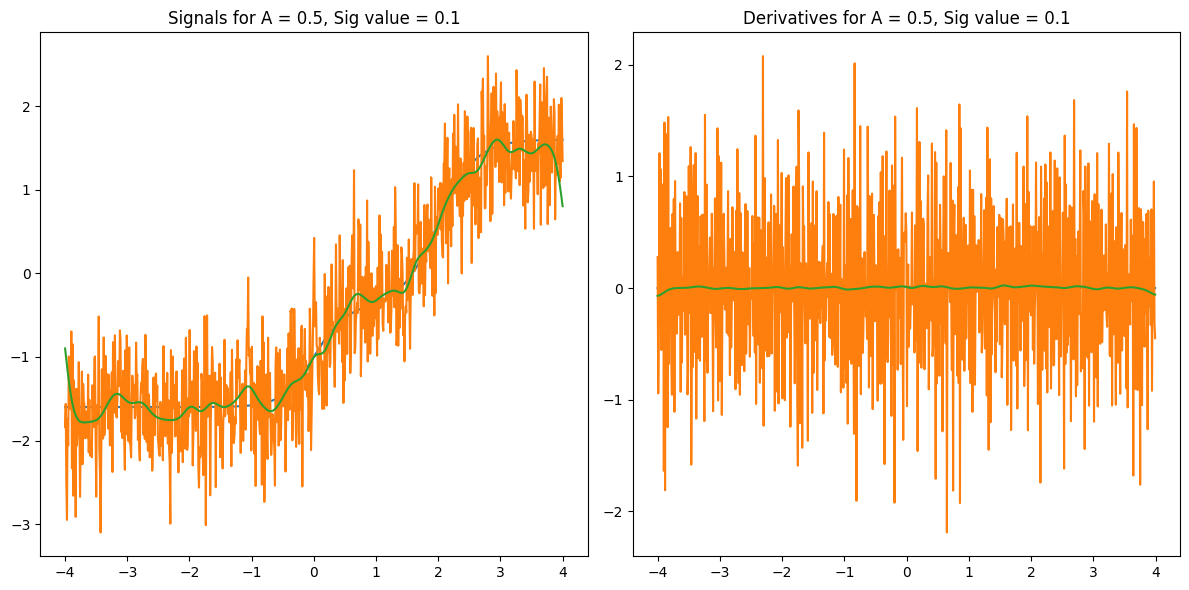

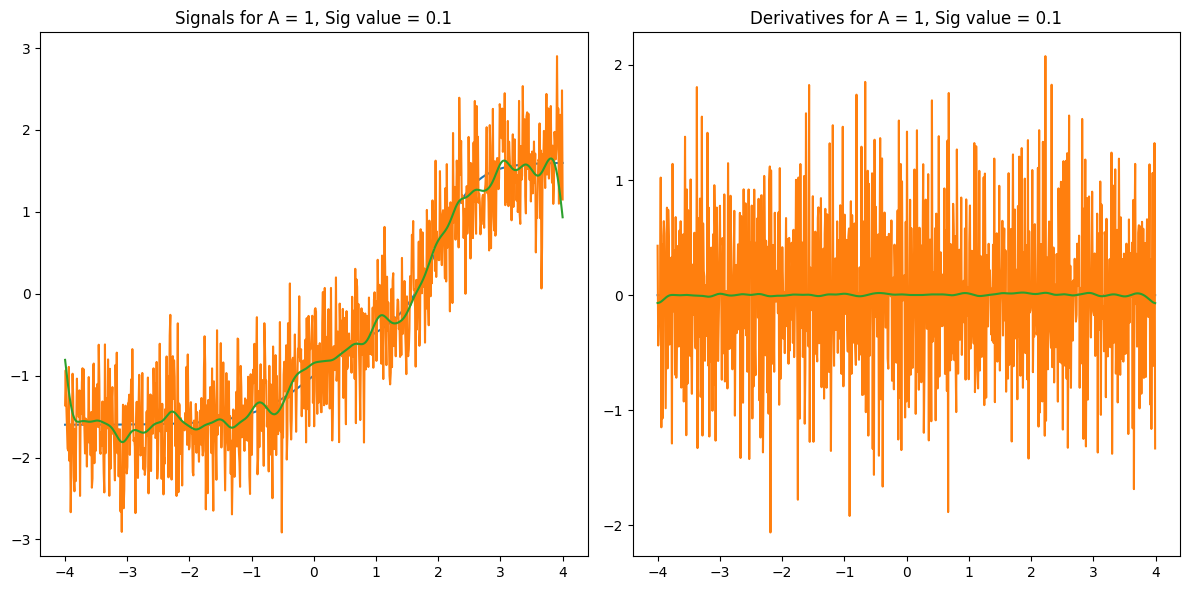

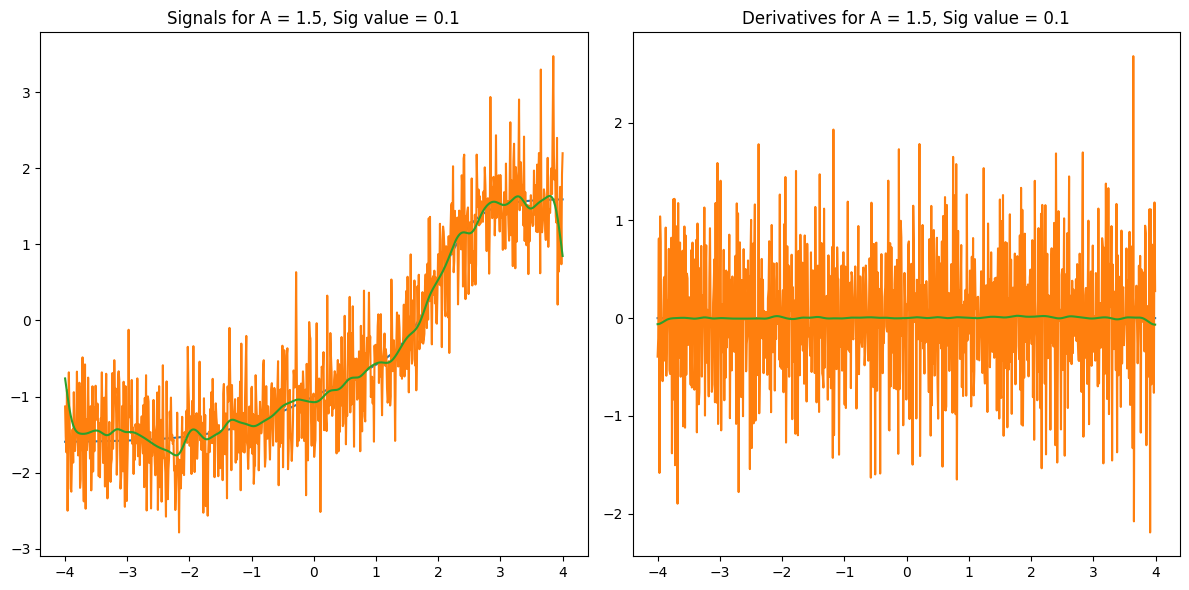

In [23]:
N = 800
#sig = 0.005
sig_values = [0.005, 0.5, 0.1]

def gaussian(x,sig):
    return np.exp(-(x/sig)**2/2) / (sig*(2*np.pi)**0.5)

for sig in sig_values:

    x = np.linspace(-4,4,N)
    g = gaussian(x,sig)

    plt.figure(1)
    plt.plot(x,g)
    plt.title(f"Gaussian Kernel for sig = {sig}")

    for A in A_values:
        
            noise = np.random.normal(0,0.5,N)
            clean_signal = 0.6 * np.tanh(x/A) + np.tanh((x-2)/0.6)
            noisy_signal = clean_signal + noise

            smooth_signal = np.convolve(g,noisy_signal,mode="same")*(x[1]-x[0])

            fig, ax = plt.subplots(1, 2, figsize=(12, 6))
            ax[0].plot(x,clean_signal,x,noisy_signal,x,smooth_signal)
            ax[0].set_title(f"Signals for A = {A}, Sig value = {sig}")


            x_diff = x[:-1]
            #plt.figure()
            ax[1].plot (x_diff,np.diff(clean_signal),x_diff,np.diff(noisy_signal),x_diff,np.diff(smooth_signal))
            ax[1].set_title(f"Derivatives for A = {A}, Sig value = {sig}")
            
            plt.tight_layout()


Smaller sig preserves more noise leading to less smoothing effect. Larger sig smoothes the fuction out but if too large can almost over fit

# **Problem 3**

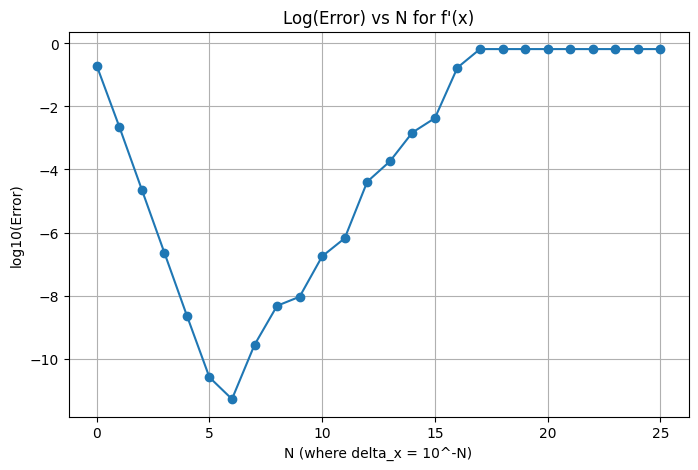

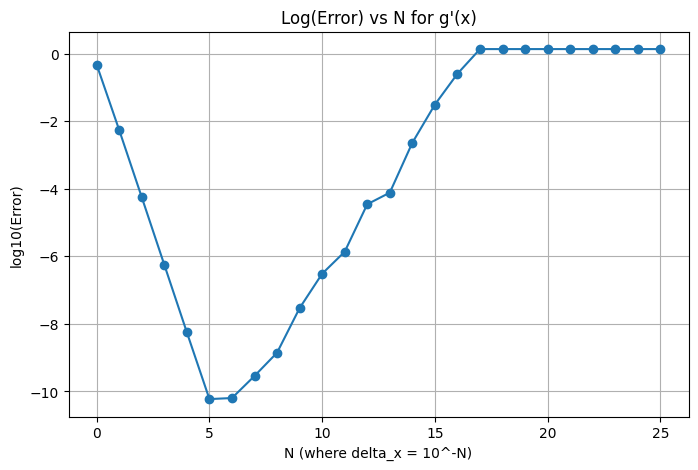

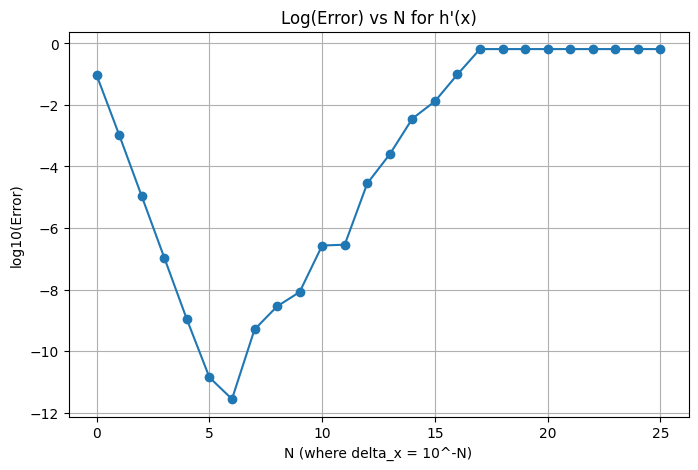

In [5]:
def f(x):
    return x * np.exp(-x**2 / 2)

def g(x):
    return np.cos(x**2 + x)

def h_func(x):
    return 1 / (x**2 + x + 1)

def calc_f_prime(x):
    return np.exp(-x**2 / 2) * (1 - x**2)

def calc_g_prime(x):
    return -np.sin(x**2 + x) * (2 * x + 1)

def calc_h_prime(x):
    return -(2 * x + 1) / (x**2 + x + 1)**2

def central_difference(func, x, h):
    return (func(x + h) - func(x - h)) / (2 * h)

xi = 0.5
N_values = np.arange(26)
delta_x_values = 10.0**-N_values

f_prime_approx = []
g_prime_approx = []
h_prime_approx = []

#part b
for h in delta_x_values:
    f_prime_approx.append(central_difference(f, xi, h))
    g_prime_approx.append(central_difference(g, xi, h))
    h_prime_approx.append(central_difference(h_func, xi, h))

f_prime_exact_value = calc_f_prime(xi)
g_prime_exact_value = calc_g_prime(xi)
h_prime_exact_value = calc_h_prime(xi)

f_prime_approx = np.array(f_prime_approx)
g_prime_approx = np.array(g_prime_approx)
h_prime_approx = np.array(h_prime_approx)

f_prime_error = np.abs(f_prime_approx - f_prime_exact_value)
g_prime_error = np.abs(g_prime_approx - g_prime_exact_value)
h_prime_error = np.abs(h_prime_approx - h_prime_exact_value)

plt.figure(figsize=(8, 5))
plt.plot(N_values, np.log10(f_prime_error), marker='o')
plt.xlabel("N (where delta_x = 10^-N)")
plt.ylabel("log10(Error)")
plt.title("Log(Error) vs N for f'(x)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(N_values, np.log10(g_prime_error), marker='o')
plt.xlabel("N (where delta_x = 10^-N)")
plt.ylabel("log10(Error)")
plt.title("Log(Error) vs N for g'(x)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(N_values, np.log10(h_prime_error), marker='o')
plt.xlabel("N (where delta_x = 10^-N)")
plt.ylabel("log10(Error)")
plt.title("Log(Error) vs N for h'(x)")
plt.grid(True)
plt.show()


Error Decreases initially and then starts increasing. So there is an optimal detla x but this is most likely due to round-off errors which causes the error to increase